# **Naive Bayes Classifier for numeric data**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
#from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [0]:
br = load_breast_cancer()
X = pd.DataFrame(br.data, columns=br.feature_names)
#X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(br.target, br.target_names)
y = pd.get_dummies(y, drop_first=False)

In [0]:
#Y=np.array(y['setosa'])+2*np.array(y['versicolor'])+3*np.array(y['virginica'])
#Y
y_b=y['benign']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_b, test_size=0.1,random_state=1)

In [118]:
nu_nb = GaussianNB()
nu_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred=nu_nb.predict(X_test)

**Confusion matrix**

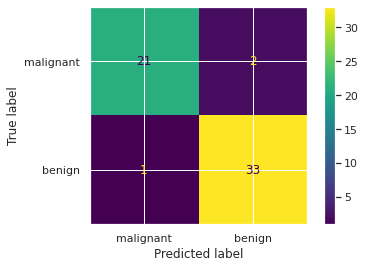

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nu_nb, X_test, y_test,
                                 display_labels=br.target_names)

**Precision Recall curve**

For malignant cancers: precision=0.9545454545454546 recall=0.9130434782608695
For benign cancers: precision=0.9428571428571428 recall=0.9705882352941176


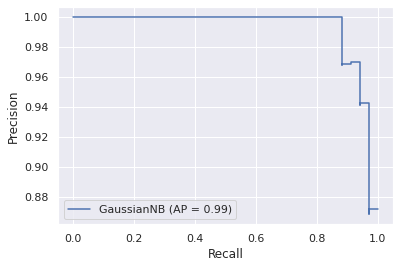

In [133]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

plot_precision_recall_curve(nu_nb,X_test,y_test)

v=precision_recall_fscore_support(y_test,y_pred)
print("For malignant cancers: precision="+str(v[0][0])+" recall="+str(v[1][0]))
print("For benign cancers: precision="+str(v[0][1])+" recall="+str(v[1][1]))

In [154]:
print("Accuracy for predicting benign or malignant cancer:"+str(accuracy_score(y_test,y_pred)))

Accuracy for predicting benign or malignant cancer:0.9479768786127167


# **Naive Bayes Classifier for nominal data**

In [136]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [138]:
df=pd.read_csv("/content/drive/My Drive/car_acc.csv")
df

,buying,maint,doors,persons,lug_boot,safety,acc
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,1
1724,low,low,5more,more,med,high,1
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,1


In [0]:
X=df[df.columns[0:6]]
Y=df[df.columns[6]]

X=pd.get_dummies(X)

In [0]:
from sklearn.naive_bayes import CategoricalNB
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=1)

In [146]:
cat_nb = CategoricalNB()
cat_nb.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred=cat_nb.predict(X_test)

**Confusion matrix**

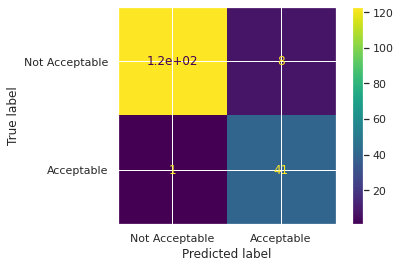

In [150]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cat_nb, X_test, y_test,
                                 display_labels=["Not Acceptable",'Acceptable'])

**Precision Recall curve**

For not acceptable cars: precision=0.9919354838709677 recall=0.9389312977099237
For acceptable cars: precision=0.8367346938775511 recall=0.9761904761904762


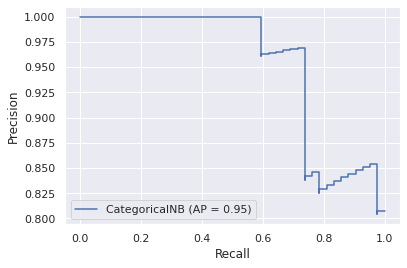

In [153]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

plot_precision_recall_curve(cat_nb,X_test,y_test)

v=precision_recall_fscore_support(y_test,y_pred)
print("For not acceptable cars: precision="+str(v[0][0])+" recall="+str(v[1][0]))
print("For acceptable cars: precision="+str(v[0][1])+" recall="+str(v[1][1]))

In [155]:
print("Accuracy for predicting not acceptable or acceptable car:"+str(accuracy_score(y_test,y_pred)))

Accuracy for predicting not acceptable or acceptable car:0.9479768786127167
